**Aggregált számítások stílusok szerint (átlag,max,min,sum )**

In [21]:
SELECT          stilus, 
                SUM(nettoar) as 'Összesen',
                ROUND(AVG(nettoar),1) as 'Átlagár', 
                MAX(nettoar)  as 'Max ár', 
                MIN(nettoar) as 'Minimális ár'
FROM dvd
where stilus is not null
GROUP BY stilus
ORDER BY SUM(nettoar) DESC, ROUND(AVG(nettoar),1) DESC

(47 rows affected)

Total execution time: 00:00:00.078

stilus,Összesen,Átlagár,Max ár,Minimális ár
játék,291028,"4850,5",6078,3110
ismeretterjesztő,217427,"4726,7",6072,3256
nyelvtanító,199898,"4759,5",6082,3115
történelem,190885,"4655,7",6084,3122
földrajz,73281,"4580,1",6065,3123
irodalom,71427,"4464,2",5654,3391
matematika,40687,"4520,8",5995,3105
csillagászat,33135,"4733,6",5992,3582
szótár,32371,"4624,4",5734,3509
zene,29132,"4855,3",5730,3391


**Darabszám nettóár nagyságrend szerint**

In [11]:
SELECT Round(nettoar,-2) as 'Nettóár százra kerekítve', count(id) as 'Darabszám'
FROM dvd
GROUP BY Round(nettoar,-2)
ORDER BY Round(nettoar,-2) ASC

(31 rows affected)

Total execution time: 00:00:00.065

Nettóár százra kerekítve,Darabszám
3100,10
3200,3
3300,8
3400,8
3500,12
3600,8
3700,12
3800,10
3900,12
4000,7


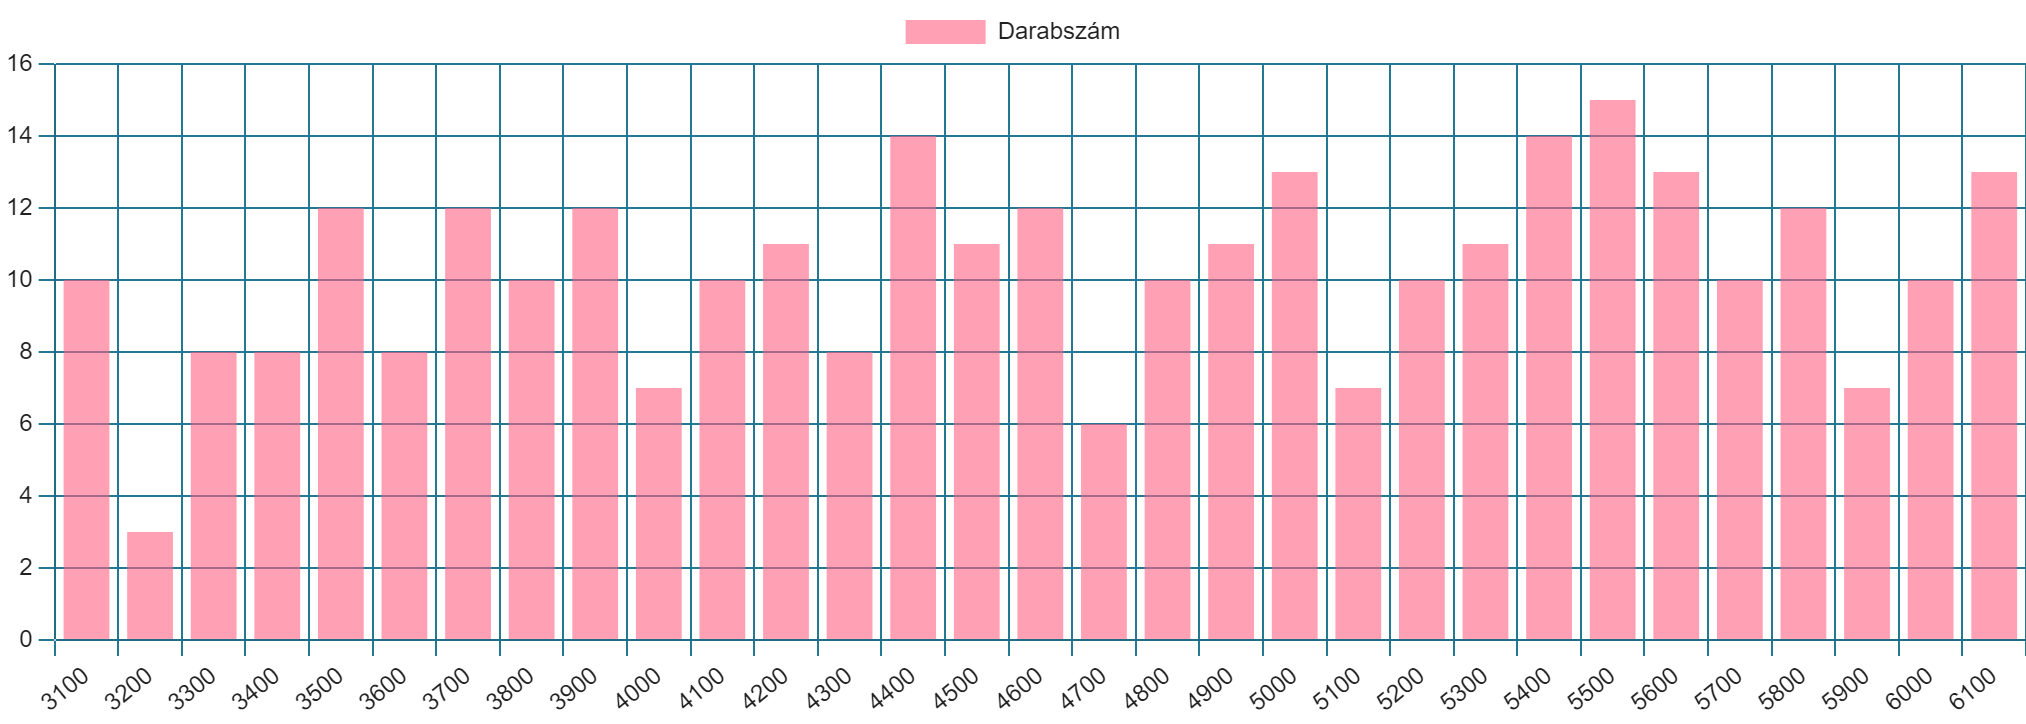

**10 legkisebb szórással rendelkező stílus ár szerint**

In [10]:
SELECT TOP 10 stilus, ROUND(stdev(nettoar),2) as 'Szórás', Max(nettoar)-Min(nettoar) as 'Eltérés'
FROM dvd
GROUP by stilus
HAVING round(stdev(nettoar),2) is not null
ORDER BY round(stdev(nettoar),2) ASC

(10 rows affected)

Total execution time: 00:00:00.032

stilus,Szórás,Eltérés
állattan,"562,85",1082
festészet,"717,01",1014
filmtörténet,"753,78",1066
irodalom,"778,08",2263
zene,"824,88",2339
játék (autóverseny),"826,34",1899
történelem,"841,66",2962
játék,"842,01",2968
játék (labdarúgás),"851,62",1651
biológia,"868,99",2061


**Melyik stílus hány ember kedvence**

In [9]:
SELECT kedvencstilus as 'Kedvenc stílus',count(id) as 'Darabszám'
FROM tagok
GROUP BY kedvencstilus

(4 rows affected)

Total execution time: 00:00:00.030

Kedvenc stílus,Darabszám
földrajz,4
játék,4
sport,5
történelem,4


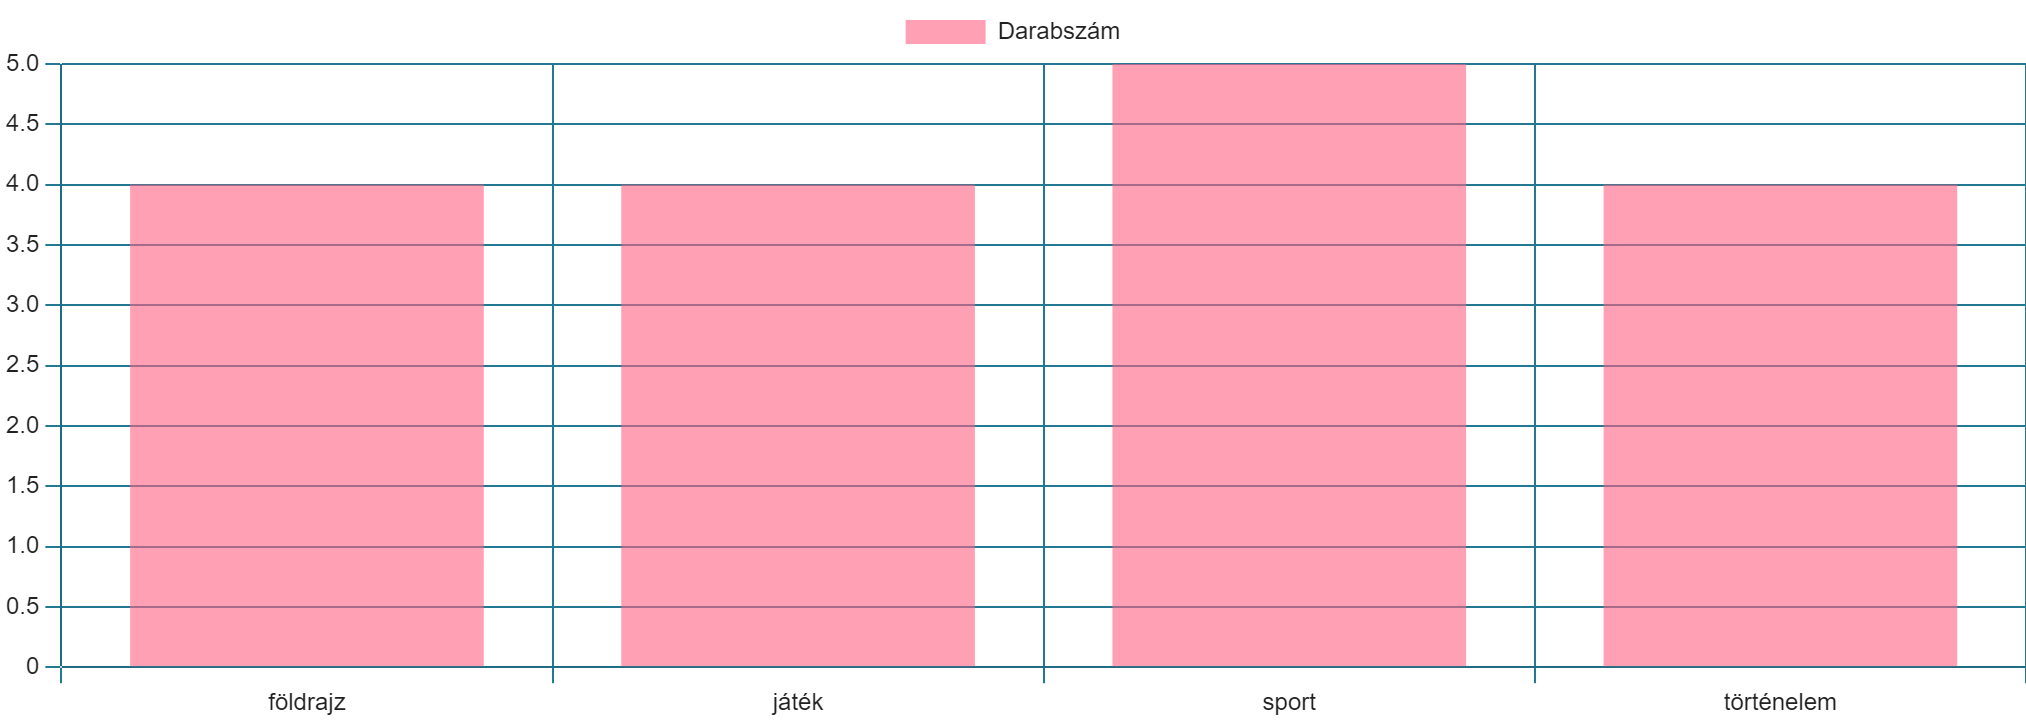

**Tagok nevének hosszának aggregált függvényei**

In [1]:
SELECT AVG(LEN(nev)) as 'Átlagos hossz',
        MAX(Len(nev)) as 'Maximális hossz', 
        min(len(nev)) as 'Minimális hossz', 
        Round(stdev(len(nev)),0) as 'Hosszok szórása egészre kerekítve'
FROM tagok

(1 row affected)

Total execution time: 00:00:00.104

Átlagos hossz,Maximális hossz,Minimális hossz,Hosszok szórása egészre kerekítve
14,23,10,3


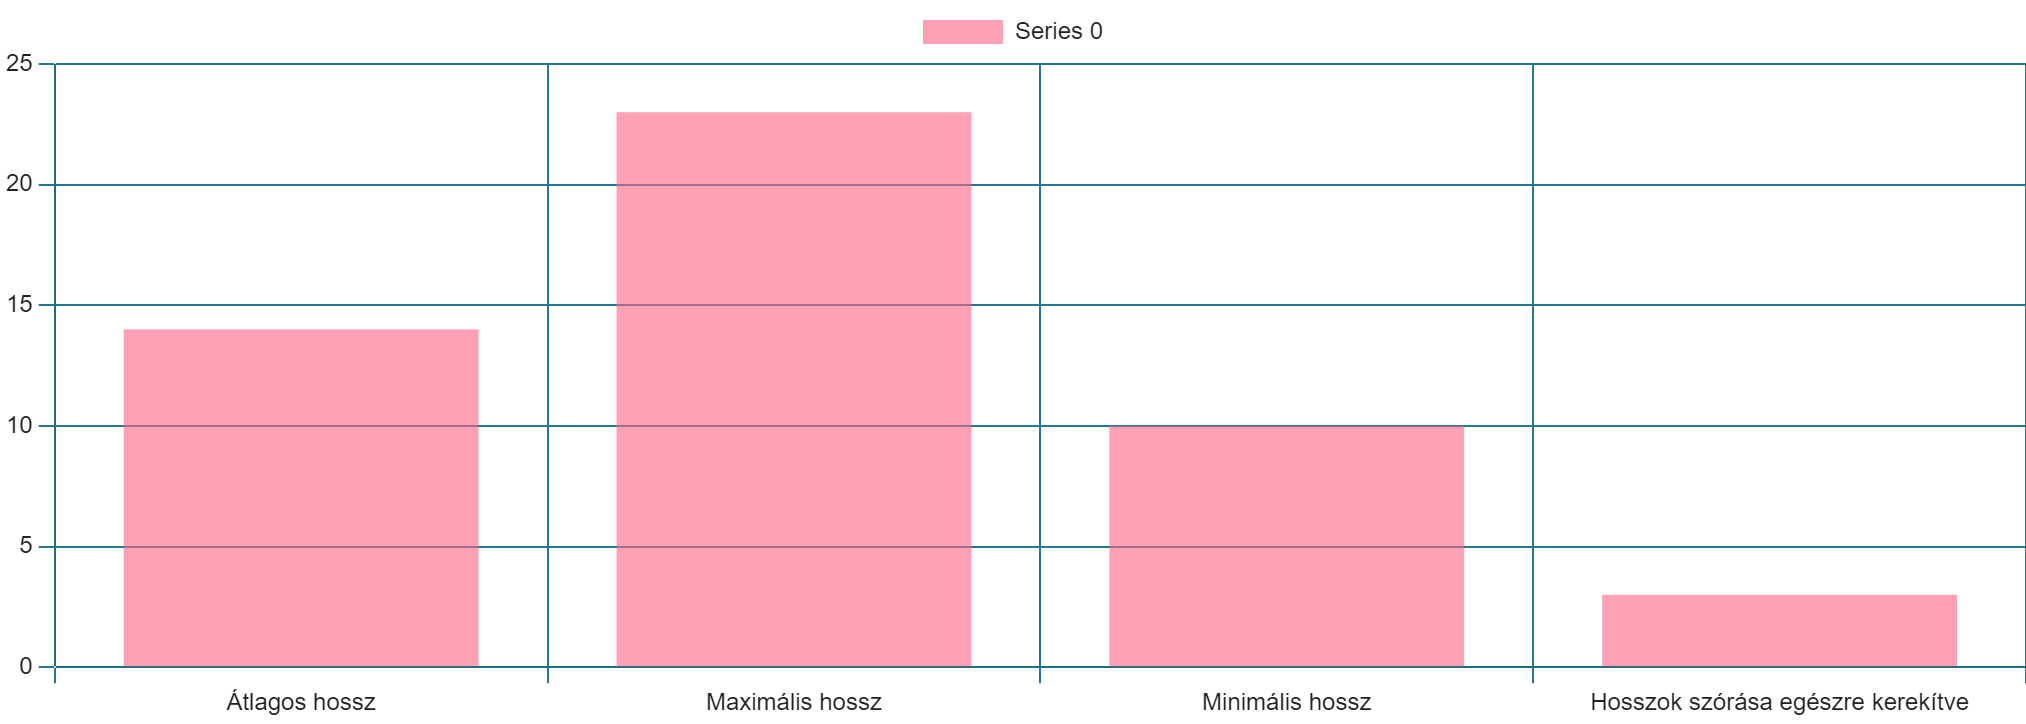

**Nevek megoszlása hossz szerint**

In [20]:
SELECT IIF(Len(nev)<=14,'Rövid',IIF(len(nev)<=18,'Közepes','Hosszú')) as 'Név hossza', Count(nev)
FROM tagok
GROUP BY IIF(Len(nev)<=14,'Rövid',IIF(len(nev)<=18,'Közepes','Hosszú'))
ORDER BY Count(nev) DESC

(3 rows affected)

Total execution time: 00:00:00.299

Név hossza,(No column name)
Rövid,11
Közepes,5
Hosszú,1


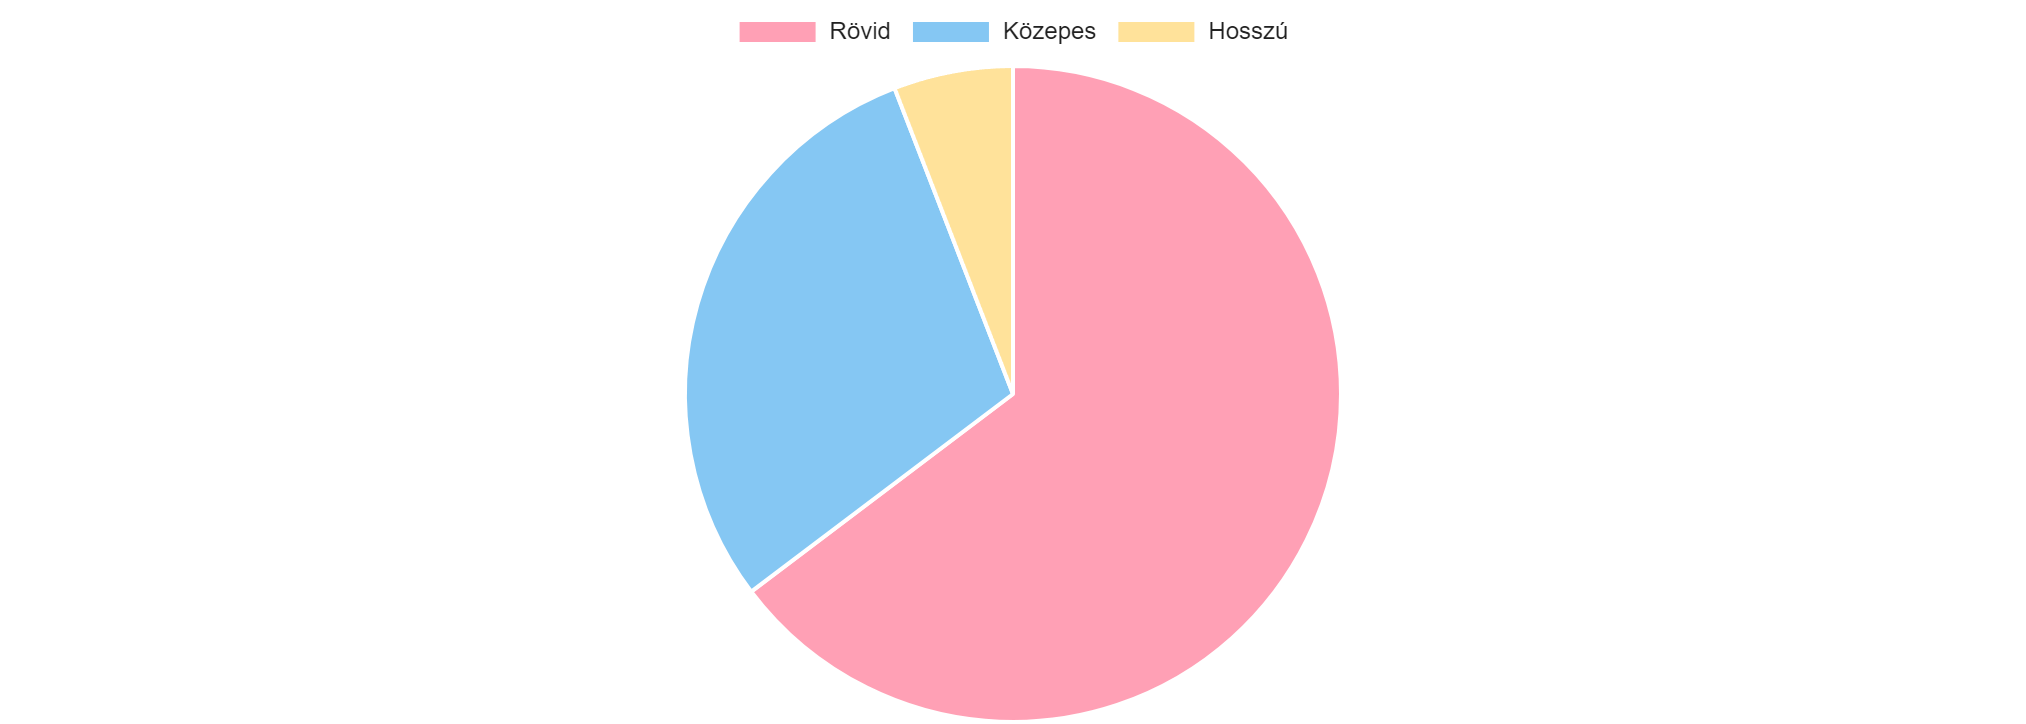